# CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Reshape images in ANN

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

print("X_train new shape", x_train.shape)
print("X_test new shape", x_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
X_train new shape (60000, 784)
X_test new shape (10000, 784)


In [ ]:
num_classes=10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 59us/sample - loss: 2.2891 - accuracy: 0.1462
Epoch 2/2
60000/60000 [==============================] - 3s 51us/sample - loss: 2.1025 - accuracy: 0.3325


## Convolution Layer

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


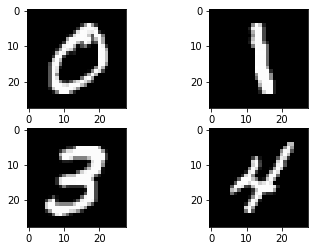

In [ ]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Random kernel_initializer

Actual Image


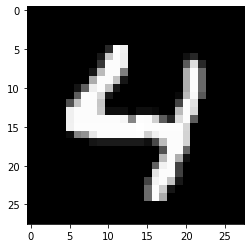

Random Weights Kennel


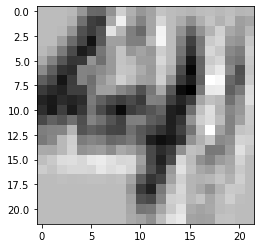

In [ ]:
#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]


print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Constant kernel_initializer

In [ ]:
import numpy as np
filter1=np.array([[1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1]])
print("filter1 \n", filter1)

filter2=np.transpose(filter1)
print("filter2 \n",filter2)

filter1 
 [[  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]]
filter2 
 [[  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]]


Actual Image


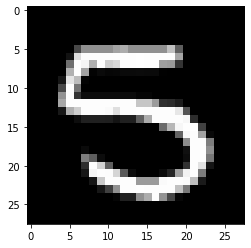

Horizontal Line


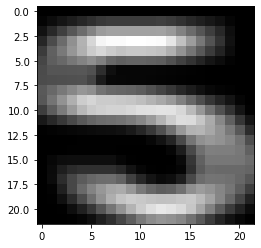

Vertical Line


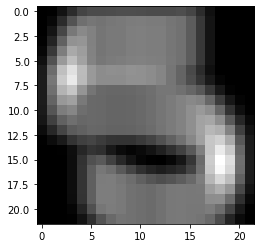

In [ ]:
#634 #924 #952 #3611  #4458
x=X_train[924]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Conv2D(1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer=keras.initializers.Constant(filter1)))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Conv2D(1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer=keras.initializers.Constant(filter2)))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Filters for Colour Images

4417
imp_path D:\Google Drive\Training\Datasets\CIFAR10\CIFAR10\43534.png
(32, 32, 3)
[[[12.156863  10.666667   8.235294 ]
  [12.941177   9.176471   7.6862745]
  [13.490196   8.862745   8.       ]
  [11.372549   7.372549   6.27451  ]
  [11.607843   7.6862745  6.666667 ]]

 [[11.843138  10.745098   8.078431 ]
  [13.960785  10.82353    8.941176 ]
  [14.901961   9.960784   9.019608 ]
  [13.411765   8.941176   7.921569 ]
  [10.901961   6.666667   5.7254906]]

 [[11.6862755 10.745098   8.       ]
  [13.803922  11.058825   9.09804  ]
  [14.745098   9.725491   9.09804  ]
  [15.686275  11.215687  10.82353  ]
  [11.294118   7.0588236  6.745098 ]]

 [[11.294118  10.509805   7.764706 ]
  [12.235294  10.3529415  8.156863 ]
  [13.254902   9.725491   8.784314 ]
  [17.960785  15.215687  14.901961 ]
  [15.764706  13.09804   12.862745 ]]

 [[11.294118  10.666667   7.8431373]
  [12.078432  11.058825   8.470589 ]
  [14.039216  12.313726  10.509805 ]
  [18.117647  16.62745   15.921569 ]
  [17.960785  16.0

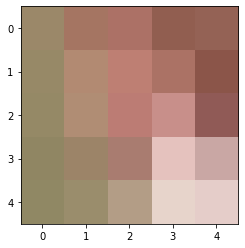

In [ ]:
i=int(np.random.rand(1,1)*60000)
print(i)

imp_path="D:\\Google Drive\\Training\\Datasets\\CIFAR10\\CIFAR10\\43534.png"
print("imp_path",imp_path)

%matplotlib inline
x=plt.imread(imp_path)
print(x.shape)
y=x[10:15,10:15]
print(y*20)
print(y.shape)
plt.imshow((y*255).astype(np.uint8))

## Zero Padding 

Actual Image Shape  (28, 28)


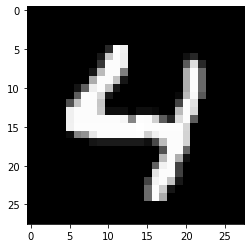

Random Weights Kennel siz3 7X7
Output Shape  (22, 22)


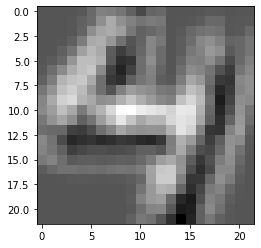

Random Weights Kennel siz3 5X5
Output Shape  (24, 24)


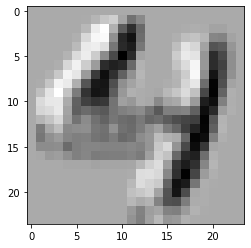

In [ ]:
#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]

print("Actual Image Shape " ,  x.shape)
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 7X7")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 5X5")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=5,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

## CNN for CIFAR10

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [ ]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


array([4], dtype=uint8)

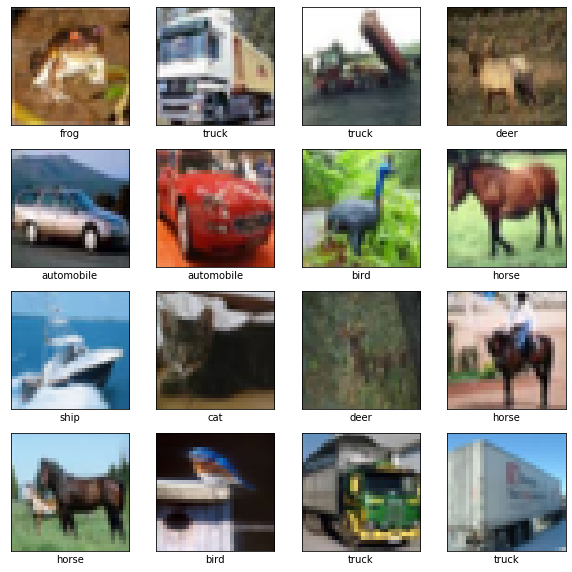

In [ ]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [ ]:
import time #To measure the execution time 
start = time.time()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=16,
          epochs=12, 
          validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.8569 - accuracy: 0.3249 - val_loss: 1.5443 - val_accuracy: 0.4411
Epoch 2/12
50000/50000 [==============================] - 49s 982us/sample - loss: 1.4183 - accuracy: 0.4879 - val_loss: 1.3052 - val_accuracy: 0.5274
Epoch 3/12
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.2444 - accuracy: 0.5590 - val_loss: 1.2131 - val_accuracy: 0.5616
Epoch 4/12
50000/50000 [==============================] - 50s 994us/sample - loss: 1.1180 - accuracy: 0.6056 - val_loss: 1.1202 - val_accuracy: 0.5992
Epoch 5/12
50000/50000 [==============================] - 49s 985us/sample - loss: 1.0173 - accuracy: 0.6425 - val_loss: 1.0124 - val_accuracy: 0.6427
Epoch 6/12
50000/50000 [==============================] - 50s 998us/sample - loss: 0.9323 - accuracy: 0.6755 - val_loss: 1.0272 - val_accuracy: 0.6407
Epoch 7/12
50000/50000 [========================

## Case Study- Sign Language Reading from Images 

In [ ]:
#Let us keep all the libraries ready
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio
import random

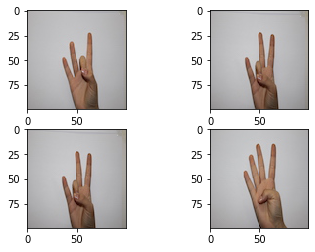

In [ ]:
#Few random Images
fig, ax = plt.subplots(2,2)
location='D:\\Google Drive\\Training\\Book\\0.Chapters\\Chapter11 CNN\\5.Datasets\\Sign_Language_Digits\\Sign-Language-Digits-Dataset-master\\Dataset\\'
i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[0,0].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[0,1].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[1,0].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"\\IMG_11"+str(img_id)+".JPG")
ax[1,1].imshow(img)

In [ ]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (100,100)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory
location_1="D:\\Google Drive\\Training\\Book\\0.Chapters\\Chapter11 CNN\\5.Datasets\\Sign-language-digits-dataset_64_64\\"
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") 

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [ ]:
model1 = Sequential()

# Convolution layer
model1.add(Conv2D(64, (3, 3), input_shape = (100, 100, 1), activation = 'relu'))

# Pooling layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding second convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding third convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model1.add(Flatten())

# Step 4 - Fully connected dense layers
model1.add(Dense(units = 256, activation = 'relu'))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)             

In [ ]:
# model1 compilation
model1.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=20,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model1.save_weights('m1_Sign_Language_20epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/20
7/7 [==============================] - 34s 5s/step - loss: 2.3045 - accuracy: 0.0992 - val_loss: 2.3017 - val_accuracy: 0.0831
Epoch 2/20
7/7 [==============================] - 34s 5s/step - loss: 2.2991 - accuracy: 0.1446 - val_loss: 2.2996 - val_accuracy: 0.1760
Epoch 3/20
7/7 [==============================] - 35s 5s/step - loss: 2.2957 - accuracy: 0.1337 - val_loss: 2.2973 - val_accuracy: 0.1125
Epoch 4/20
7/7 [==============================] - 34s 5s/step - loss: 2.2915 - accuracy: 0.1404 - val_loss: 2.2944 - val_accuracy: 0.1785
Epoch 5/20
7/7 [==============================] - 33s 5s/step - loss: 2.2868 - accuracy: 0.2269 - val_loss: 2.2899 - val_accuracy: 0.2274
Epoch 6/20
7/7 [==============================] - 35s 5s/step - loss: 2.2794 - accuracy: 0.3388 - val_loss: 2.2854 - val_accuracy: 0.2274
Epoch 7/20
7/7 [==============================] - 38s 5s/step - loss: 2.2711 - accuracy: 0.3454 - val_loss: 2.2775 - val_accuracy: 0.2225
Epoch 8/20
7/7 [==================

In [ ]:
model1.load_weights(r"D:\Google Drive\Training\Book\0.Chapters\Chapter11 CNN\5.Datasets\Models\m1_Sign_Language.h5")

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 [==============================] - 30s 4s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 2.0783 - val_accuracy: 0.6381
Epoch 2/2
7/7 [==============================] - 32s 5s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 2.0829 - val_accuracy: 0.6504


## Model-2

Change the image shape to 64X64 

In [ ]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [ ]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 128)      

In [ ]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model2.save_weights('m2_Sign_Language_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
7/7 [==============================] - 18s 3s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1477 - val_accuracy: 0.7995
Epoch 2/50
2/7 [=======>......................] - ETA: 12s - loss: 4.9726e-04 - accuracy: 1.0000

KeyboardInterrupt: 

## Model with Dropout

Batchsize Changed 

In [ ]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1653 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [ ]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)       

In [ ]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Sign_Language_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
26/26 [==============================] - 23s 887ms/step - loss: 2.3041 - accuracy: 0.0901 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 2/50
26/26 [==============================] - 24s 907ms/step - loss: 2.3035 - accuracy: 0.0932 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 3/50
26/26 [==============================] - 21s 812ms/step - loss: 2.3044 - accuracy: 0.0944 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 4/50
26/26 [==============================] - 21s 803ms/step - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3024 - val_accuracy: 0.1002
Epoch 5/50
26/26 [==============================] - 21s 801ms/step - loss: 2.3026 - accuracy: 0.0950 - val_loss: 2.3024 - val_accuracy: 0.1002
Epoch 6/50
26/26 [==============================] - 23s 894ms/step - loss: 2.3023 - accuracy: 0.1016 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 7/50
26/26 [==============================] - 20s 782ms/step - loss: 2.3040 - accuracy: 0.0841 - val_loss: 2.3024 - val_accuracy: 0.1002

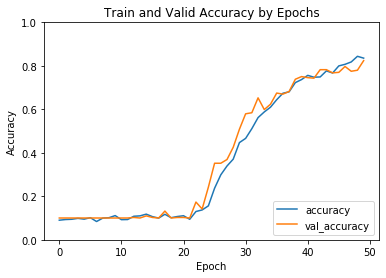

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

Dropout 100 epochs

In [ ]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=100,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Sign_Language_100epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 [==============================] - 31s 1s/step - loss: 2.3063 - accuracy: 0.1028 - val_loss: 2.3024 - val_accuracy: 0.1002
Epoch 2/100
26/26 [==============================] - 34s 1s/step - loss: 2.3053 - accuracy: 0.0913 - val_loss: 2.3022 - val_accuracy: 0.1002
Epoch 3/100
26/26 [==============================] - 31s 1s/step - loss: 2.3038 - accuracy: 0.0962 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 4/100
26/26 [==============================] - 33s 1s/step - loss: 2.3037 - accuracy: 0.0986 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 5/100
26/26 [==============================] - 30s 1s/step - loss: 2.3028 - accuracy: 0.0950 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 6/100
26/26 [==============================] - 31s 1s/step - loss: 2.3032 - accuracy: 0.0932 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 7/100
26/26 [==============================] - 32s 1s/step - loss: 2.3034 - accuracy: 0.0974 - val_loss: 2.3029 - val_accuracy: 0.1002
Epoch 8/100
2

Epoch 58/100
26/26 [==============================] - 19s 718ms/step - loss: 0.3454 - accuracy: 0.8699 - val_loss: 0.9594 - val_accuracy: 0.7237
Epoch 59/100
26/26 [==============================] - 21s 810ms/step - loss: 0.3690 - accuracy: 0.8693 - val_loss: 0.8115 - val_accuracy: 0.7506
Epoch 60/100
26/26 [==============================] - 19s 734ms/step - loss: 0.3371 - accuracy: 0.8724 - val_loss: 0.5666 - val_accuracy: 0.8166
Epoch 61/100
26/26 [==============================] - 20s 764ms/step - loss: 0.2913 - accuracy: 0.8905 - val_loss: 0.5558 - val_accuracy: 0.8240
Epoch 62/100
26/26 [==============================] - 20s 760ms/step - loss: 0.2991 - accuracy: 0.8905 - val_loss: 0.4807 - val_accuracy: 0.8264
Epoch 63/100
26/26 [==============================] - 19s 748ms/step - loss: 0.3276 - accuracy: 0.8826 - val_loss: 0.5129 - val_accuracy: 0.8313
Epoch 64/100
26/26 [==============================] - 19s 740ms/step - loss: 0.2962 - accuracy: 0.9008 - val_loss: 0.5267 - val_ac

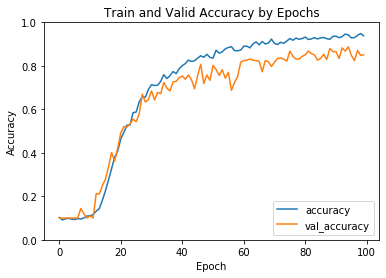

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

## Batch Normalization

In [ ]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape = (32, 32, 1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(2, (3, 3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(3, (3, 3)))
model.add(BatchNormalization())

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 1)         10        
_________________________________________________________________
batch_normalization_39 (Batc (None, 30, 30, 1)         4         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 1)         0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 15, 15, 1)         4         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 2)         20        
_________________________________________________________________
batch_normalization_41 (Batc (None, 13, 13, 2)         8         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 2)         

## Model with Batc Normalization. 

In [ ]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(16, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 10, activation = 'softmax'))

model3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
batch_normalization_59 (Batc (None, 62, 62, 16)        64        
_________________________________________________________________
dropout_17 (Dropout)         (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_60 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 30, 16)      

In [ ]:
model3.compile(optimizer =SGD(lr=0.03, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=200,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model3.save_weights('m3_BatchNorm_Sign_Language_200epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/200
26/26 [==============================] - 27s 1s/step - loss: 2.4620 - accuracy: 0.1307 - val_loss: 12.3212 - val_accuracy: 0.1027
Epoch 2/200
26/26 [==============================] - 25s 951ms/step - loss: 2.1956 - accuracy: 0.1664 - val_loss: 2.8450 - val_accuracy: 0.1345
Epoch 3/200
26/26 [==============================] - 27s 1s/step - loss: 2.0949 - accuracy: 0.2093 - val_loss: 2.3824 - val_accuracy: 0.1002
Epoch 4/200
26/26 [==============================] - 27s 1s/step - loss: 2.0271 - accuracy: 0.2117 - val_loss: 2.2106 - val_accuracy: 0.1785
Epoch 5/200
26/26 [==============================] - 25s 955ms/step - loss: 2.0088 - accuracy: 0.2226 - val_loss: 2.2543 - val_accuracy: 0.1394
Epoch 6/200
26/26 [==============================] - 24s 933ms/step - loss: 1.9366 - accuracy: 0.2505 - val_loss: 2.4071 - val_accuracy: 0.1198
Epoch 7/200
26/26 [==============================] - 25s 944ms/step - loss: 1.9218 - accuracy: 0.2613 - val_loss: 2.3620 - val_accuracy: 0.1222


Epoch 58/200
26/26 [==============================] - 18s 685ms/step - loss: 0.8132 - accuracy: 0.7114 - val_loss: 0.8804 - val_accuracy: 0.6919
Epoch 59/200
26/26 [==============================] - 15s 569ms/step - loss: 0.7410 - accuracy: 0.7393 - val_loss: 0.8960 - val_accuracy: 0.7042
Epoch 60/200
26/26 [==============================] - 18s 696ms/step - loss: 0.7461 - accuracy: 0.7302 - val_loss: 0.8972 - val_accuracy: 0.7017
Epoch 61/200
26/26 [==============================] - 15s 587ms/step - loss: 0.7453 - accuracy: 0.7320 - val_loss: 1.4119 - val_accuracy: 0.6308
Epoch 62/200
26/26 [==============================] - 14s 548ms/step - loss: 0.7598 - accuracy: 0.7374 - val_loss: 1.0670 - val_accuracy: 0.6724
Epoch 63/200
26/26 [==============================] - 14s 547ms/step - loss: 0.7556 - accuracy: 0.7235 - val_loss: 0.9781 - val_accuracy: 0.6748
Epoch 64/200
26/26 [==============================] - 14s 551ms/step - loss: 0.7419 - accuracy: 0.7429 - val_loss: 1.0766 - val_ac

26/26 [==============================] - 17s 667ms/step - loss: 0.5135 - accuracy: 0.8143 - val_loss: 0.6529 - val_accuracy: 0.8093
Epoch 171/200
26/26 [==============================] - 16s 598ms/step - loss: 0.5557 - accuracy: 0.8143 - val_loss: 0.6394 - val_accuracy: 0.8068
Epoch 172/200
26/26 [==============================] - 16s 602ms/step - loss: 0.5456 - accuracy: 0.8203 - val_loss: 0.6364 - val_accuracy: 0.7848
Epoch 173/200
26/26 [==============================] - 17s 647ms/step - loss: 0.5818 - accuracy: 0.7895 - val_loss: 0.7460 - val_accuracy: 0.7824
Epoch 174/200
26/26 [==============================] - 17s 643ms/step - loss: 0.5319 - accuracy: 0.8197 - val_loss: 0.8192 - val_accuracy: 0.7555
Epoch 175/200
26/26 [==============================] - 17s 639ms/step - loss: 0.4954 - accuracy: 0.8288 - val_loss: 0.8076 - val_accuracy: 0.7677
Epoch 176/200
26/26 [==============================] - 17s 646ms/step - loss: 0.5178 - accuracy: 0.8137 - val_loss: 0.5853 - val_accuracy:

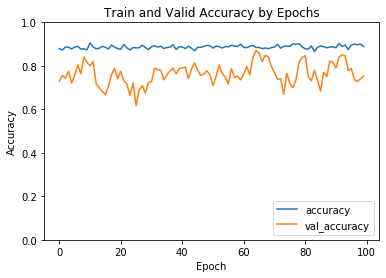

In [ ]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

## Adam  Optimizer 

In [ ]:
model3.compile(optimizer =Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=100,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model3.save_weights('m3_Adam_BatchNorm_Sign_Language_100epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 [==============================] - 18s 701ms/step - loss: 2.4890 - accuracy: 0.1077 - val_loss: 2.4831 - val_accuracy: 0.1002
Epoch 2/100
26/26 [==============================] - 17s 663ms/step - loss: 2.2032 - accuracy: 0.1627 - val_loss: 2.9257 - val_accuracy: 0.1002
Epoch 3/100
26/26 [==============================] - 21s 815ms/step - loss: 1.9710 - accuracy: 0.2535 - val_loss: 4.3809 - val_accuracy: 0.1002
Epoch 4/100
26/26 [==============================] - 17s 652ms/step - loss: 1.7656 - accuracy: 0.3618 - val_loss: 7.3481 - val_accuracy: 0.1002
Epoch 5/100
26/26 [==============================] - 18s 700ms/step - loss: 1.6192 - accuracy: 0.4102 - val_loss: 9.3906 - val_accuracy: 0.1002
Epoch 6/100
26/26 [==============================] - 16s 625ms/step - loss: 1.5055 - accuracy: 0.4471 - val_loss: 9.8045 - val_accuracy: 0.1002
Epoch 7/100
26/26 [==============================] - 22s 849ms/step - loss: 1.4246 - accuracy: 0.4676 - val_loss: 10.3337 - val_accuracy

26/26 [==============================] - 17s 635ms/step - loss: 0.5838 - accuracy: 0.7913 - val_loss: 1.4227 - val_accuracy: 0.6870
Epoch 58/100
26/26 [==============================] - 17s 647ms/step - loss: 0.5848 - accuracy: 0.7877 - val_loss: 0.7526 - val_accuracy: 0.7873
Epoch 59/100
26/26 [==============================] - 18s 681ms/step - loss: 0.6246 - accuracy: 0.7713 - val_loss: 0.8367 - val_accuracy: 0.7579
Epoch 60/100
26/26 [==============================] - 17s 655ms/step - loss: 0.5920 - accuracy: 0.7858 - val_loss: 8.1775 - val_accuracy: 0.2200
Epoch 61/100
26/26 [==============================] - 17s 653ms/step - loss: 0.5932 - accuracy: 0.7780 - val_loss: 0.8325 - val_accuracy: 0.7873
Epoch 62/100
26/26 [==============================] - 17s 650ms/step - loss: 0.5528 - accuracy: 0.8016 - val_loss: 3.9618 - val_accuracy: 0.4743
Epoch 63/100
26/26 [==============================] - 16s 608ms/step - loss: 0.5769 - accuracy: 0.7973 - val_loss: 0.9202 - val_accuracy: 0.765

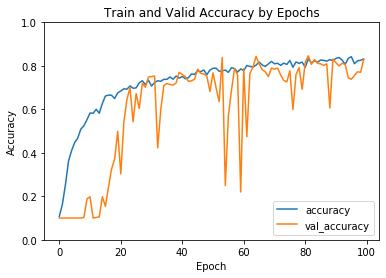

In [ ]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')